<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/przeuczenie_niedouczenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px
import plotly.graph_objects as go
np.random.seed(42)
sns.set(font_scale=1.3)

In [2]:
raw_data = make_moons(n_samples=1000, noise=0.25, random_state=42)
data =raw_data[0]
target = raw_data[1]
print(f'data shape: {data.shape}')
print(f'data sample: {data[:5]}')

print(f'target shape: {target.shape}')
print(f'target sample: {target[:5]}')



data shape: (1000, 2)
data sample: [[-0.14176498  0.55823629]
 [ 1.19796627 -0.30399544]
 [ 0.759391    0.1102501 ]
 [ 0.02331452 -0.60356298]
 [-0.80797972  0.54846574]]
target shape: (1000,)
target sample: [1 1 1 1 0]


In [3]:
np.unique(target)

array([0, 1])

In [4]:
df = pd.DataFrame(data = np.c_[data,target], columns = ['x1','x2','target'])
df.head()

,x1,x2,target
0,-0.141765,0.558236,1.0
1,1.197966,-0.303995,1.0
2,0.759391,0.110250,1.0
3,0.023315,-0.603563,1.0
4,-0.807980,0.548466,0.0


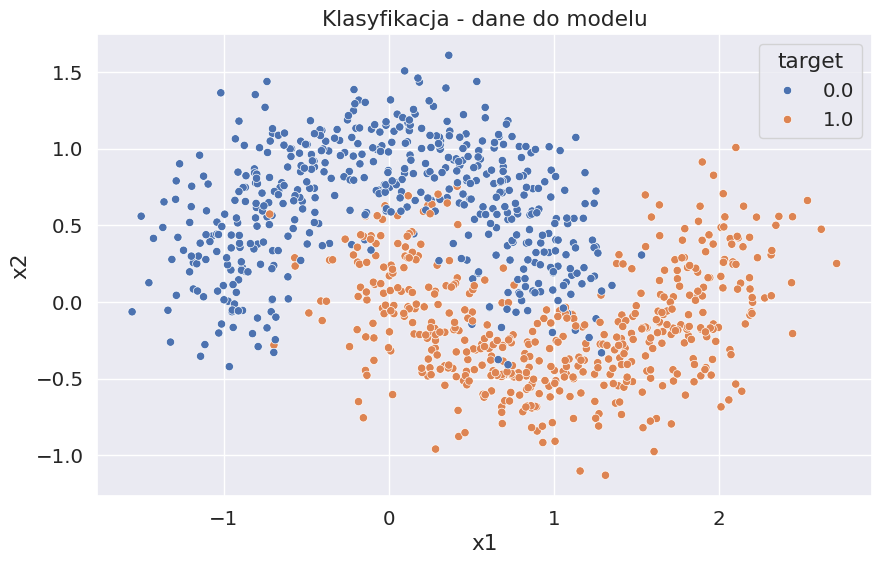

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='x1',y='x2',hue='target',data=df)
plt.title("Klasyfikacja - dane do modelu")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

In [7]:
# y_train to Twoja tablica
labels, counts = np.unique(y_train, return_counts=True)
procenty = (counts / counts.sum()) * 100

# Wyświetlenie ładnego wyniku
for label, proc in zip(labels, procenty):
    print(f"y_train : Klasa {label}: {proc:.2f}%")

# y_train to Twoja tablica
labels, counts = np.unique(y_test, return_counts=True)
procenty = (counts / counts.sum()) * 100

# Wyświetlenie ładnego wyniku
for label, proc in zip(labels, procenty):
    print(f"y_test : Klasa {label}: {proc:.2f}%")

y_train : Klasa 0: 49.14%
y_train : Klasa 1: 50.86%
y_test : Klasa 0: 52.00%
y_test : Klasa 1: 48.00%


In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

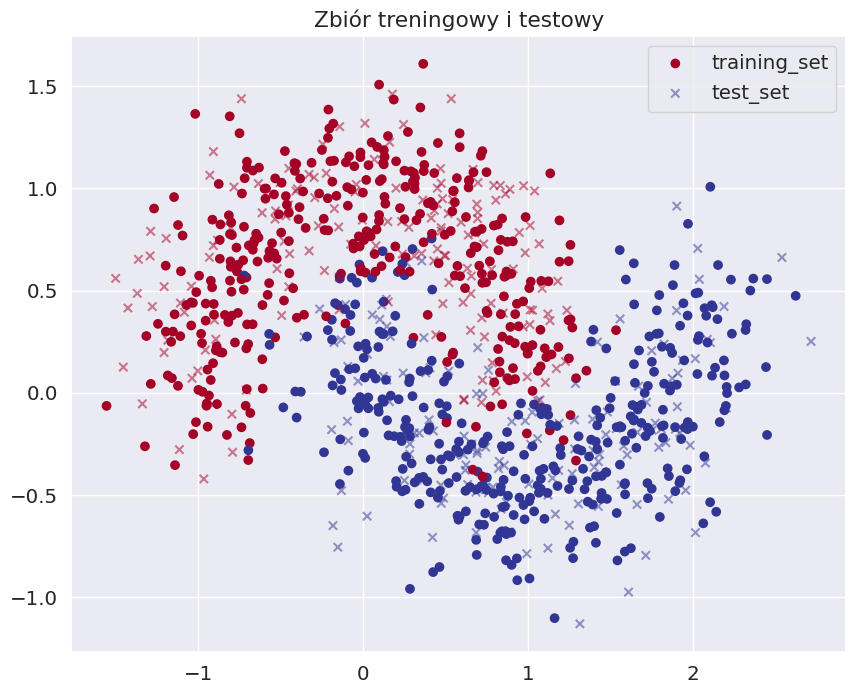

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

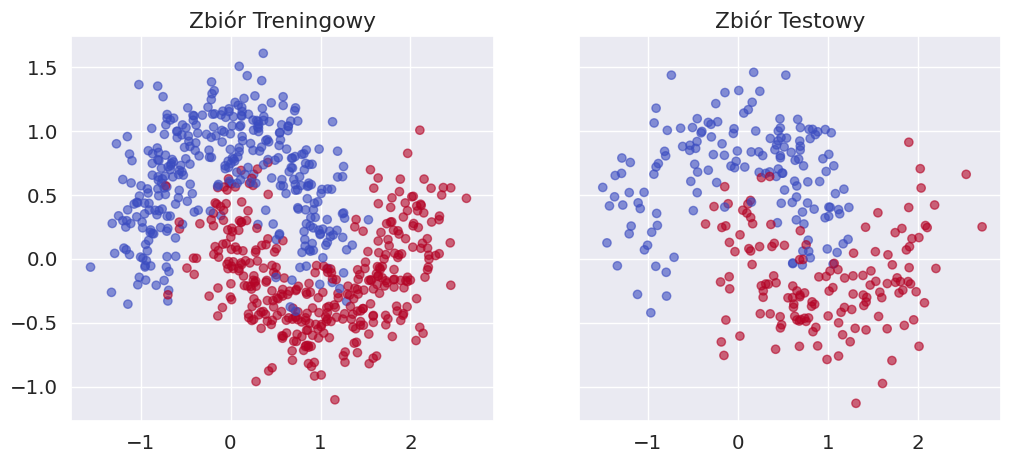

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Zbiór treningowy
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.6)
ax[0].set_title('Zbiór Treningowy')

# Zbiór testowy
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.6)
ax[1].set_title('Zbiór Testowy')

plt.show()

In [11]:
#niedouczenie regresja logistyczna

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

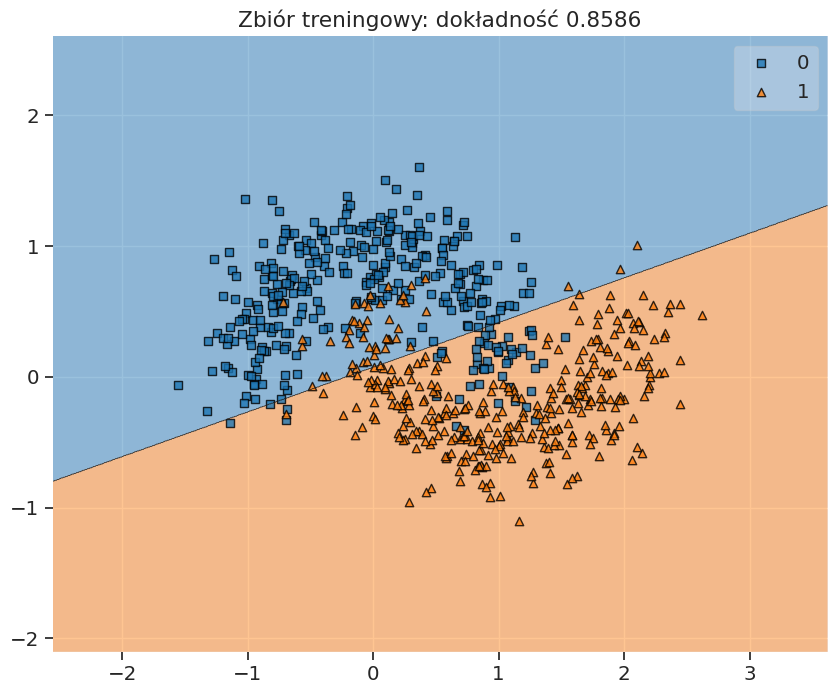

In [13]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()


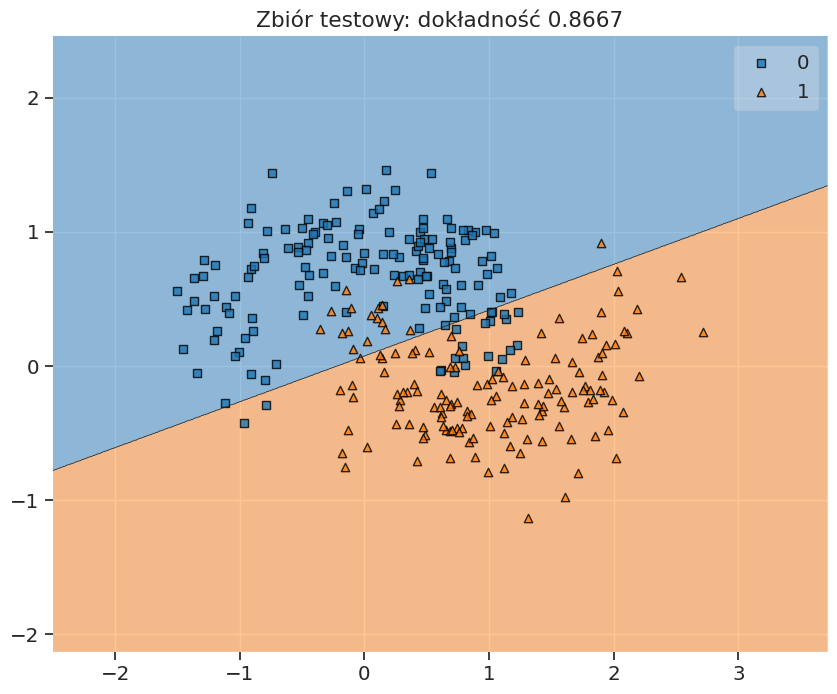

In [14]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

0.8585714285714285

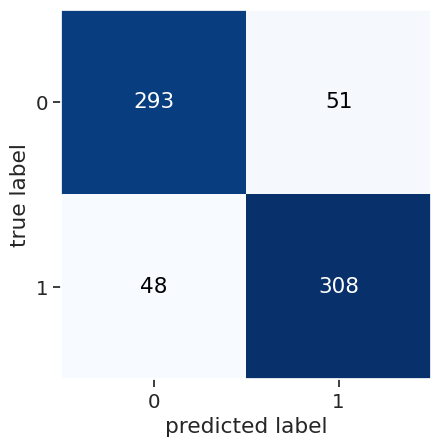

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
y_pred = classifier.predict(X_train)
cm  = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(cm)
accuracy_score(y_train, y_pred)

In [16]:
#niedouczenie - drzewo decyzyjne

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

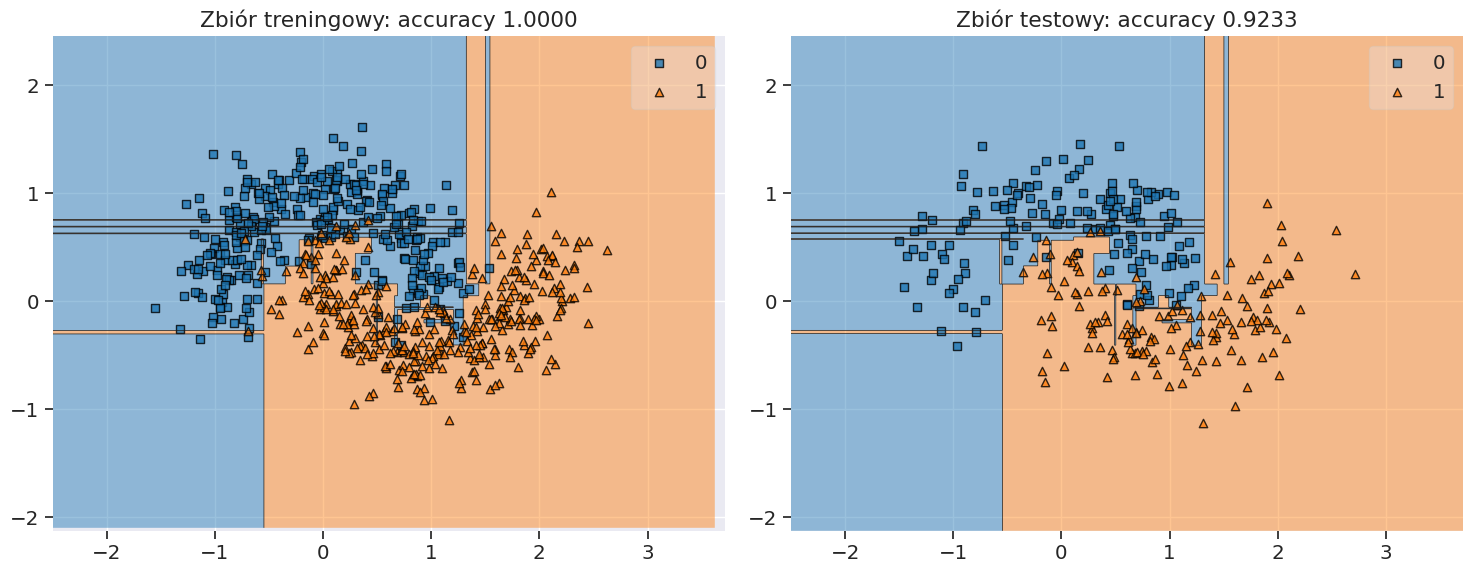

In [22]:
# Tworzymy siatkę wykresów (1 wiersz, 2 kolumny)
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

# 1. Wykres dla zbioru treningowego
plot_decision_regions(X_train, y_train.astype(int), clf=classifier, ax=ax[0])
ax[0].set_title(f'Zbiór treningowy: accuracy {classifier.score(X_train, y_train):.4f}')


# 2. Wykres dla zbioru testowego (zmieniamy ax[0] na ax[1]!)
plot_decision_regions(X_test, y_test.astype(int), clf=classifier, ax=ax[1])
ax[1].set_title(f'Zbiór testowy: accuracy {classifier.score(X_test, y_test):.4f}')


plt.tight_layout()
plt.show()

In [19]:
#przyklad przeuczenia

In [20]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

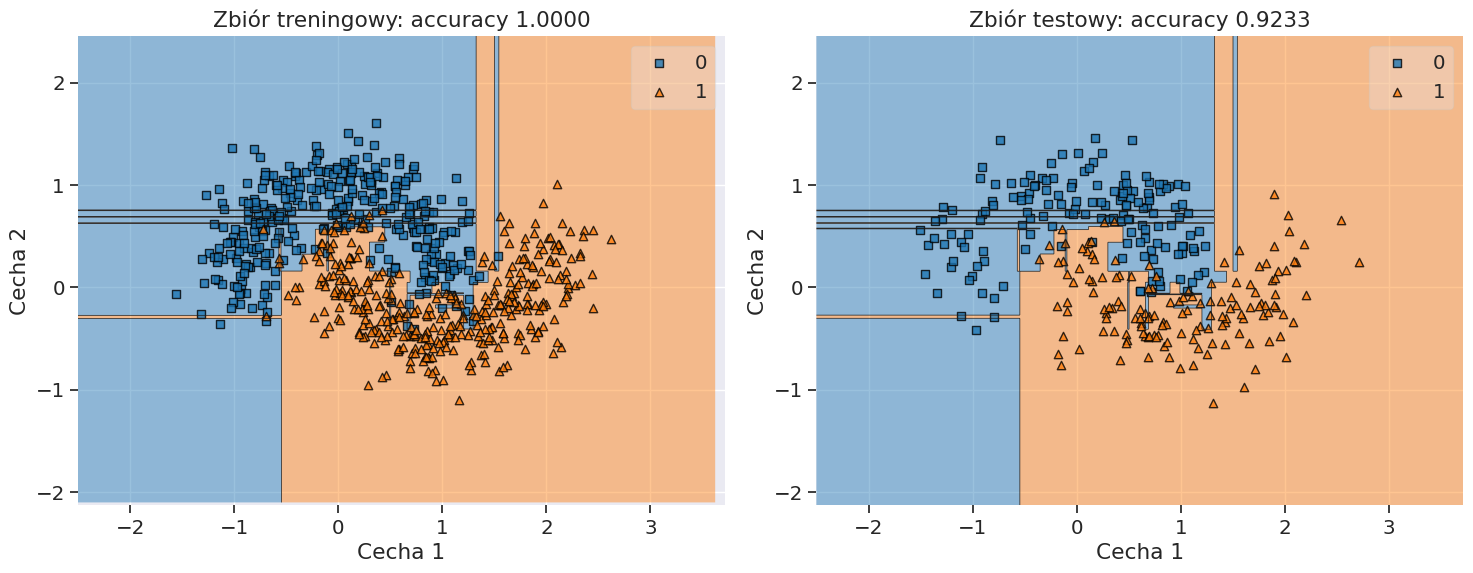

In [21]:
# Tworzymy siatkę wykresów (1 wiersz, 2 kolumny)
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

# 1. Wykres dla zbioru treningowego
plot_decision_regions(X_train, y_train.astype(int), clf=classifier, ax=ax[0])
ax[0].set_title(f'Zbiór treningowy: accuracy {classifier.score(X_train, y_train):.4f}')
ax[0].set_xlabel('Cecha 1')
ax[0].set_ylabel('Cecha 2')

# 2. Wykres dla zbioru testowego (zmieniamy ax[0] na ax[1]!)
plot_decision_regions(X_test, y_test.astype(int), clf=classifier, ax=ax[1])
ax[1].set_title(f'Zbiór testowy: accuracy {classifier.score(X_test, y_test):.4f}')
ax[1].set_xlabel('Cecha 1')
ax[1].set_ylabel('Cecha 2')

plt.tight_layout()
plt.show()